## **Installation**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

## **Data Import**

In [2]:
# Create a DataFrame from CSV data
df = pd.read_csv("strokes.csv")

In [3]:
# Display the DataFrame Shape
df.shape


(8422, 38)

In [4]:
df.head()

,tour_code,tour_description,year,tourn_id,player_id,course_id,permanent_tourn,first_name,last_name,round,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
0,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,4788,1255,Good,With,Level,"9,093.97","9,859.90",480.316,562,126
1,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,281,1300,NaN,With,Level,"8,683.75","9,868.71",503.745,232,25
2,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,39,1304,Good,With,Level,"8,697.45","9,845.29",504.020,33,199
3,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,0,1305,Good,With,Level,0,0,0.000,0,0
4,R,PGA TOUR,2011,410,1810,688,60,Phil,Mickelson,1,...,231,1307,Good,With,Level,"9,211.50","10,024.61",490.756,214,347


In [5]:
df.describe(include="all")

,tour_code,tour_description,year,tourn_id,player_id,course_id,permanent_tourn,first_name,last_name,round,...,dist_to_hole_after_shot,time,lie,elevation,slope,x,y,z,dist_from_center,dist_from_edge
count,8422,8422,8422.0,8422.0,8422.000000,8422.0,8422.0,8422,8422,8422.000000,...,8422.000000,8422.000000,7301,8422,8422,8422,8422,8422.000000,8422.000000,8422.000000
unique,1,1,NaN,NaN,NaN,NaN,NaN,29,30,NaN,...,NaN,NaN,3,4,4,6075,6029,NaN,NaN,NaN
top,R,PGA TOUR,NaN,NaN,NaN,NaN,NaN,Jason,Byrd,NaN,...,NaN,NaN,Good,With,Level,0,0,NaN,NaN,NaN
freq,8422,8422,NaN,NaN,NaN,NaN,NaN,554,297,NaN,...,NaN,NaN,7199,8226,8085,2187,2187,NaN,NaN,NaN
mean,NaN,NaN,2011.0,410.0,22490.294942,688.0,60.0,NaN,NaN,2.508312,...,1440.300641,1450.616837,NaN,NaN,NaN,NaN,NaN,376.005709,175.697934,170.264783
std,NaN,NaN,0.0,0.0,7761.393172,0.0,0.0,NaN,NaN,1.117432,...,2598.302346,136.725379,NaN,NaN,NaN,NaN,NaN,223.579338,274.366915,227.684412
min,NaN,NaN,2011.0,410.0,1810.000000,688.0,60.0,NaN,NaN,1.000000,...,0.000000,1131.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,2011.0,410.0,21961.000000,688.0,60.0,NaN,NaN,2.000000,...,0.000000,1342.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,2011.0,410.0,24502.000000,688.0,60.0,NaN,NaN,3.000000,...,97.000000,1440.000000,NaN,NaN,NaN,NaN,NaN,493.420000,40.500000,131.000000
75%,NaN,NaN,2011.0,410.0,26476.000000,688.0,60.0,NaN,NaN,4.000000,...,820.000000,1542.000000,NaN,NaN,NaN,NaN,NaN,521.575000,245.000000,225.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8422 entries, 0 to 8421
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tour_code                8422 non-null   object 
 1   tour_description         8422 non-null   object 
 2   year                     8422 non-null   int64  
 3   tourn_id                 8422 non-null   int64  
 4   player_id                8422 non-null   int64  
 5   course_id                8422 non-null   int64  
 6   permanent_tourn          8422 non-null   int64  
 7   first_name               8422 non-null   object 
 8   last_name                8422 non-null   object 
 9   round                    8422 non-null   int64  
 10  tournament_name          8422 non-null   object 
 11  course_name              8422 non-null   object 
 12  hole                     8422 non-null   int64  
 13  hole_score               8422 non-null   int64  
 14  par_value               

In [7]:
df.nunique().sort_values(ascending=False)

x                          6075
y                          6029
z                          5690
distance                   4080
distance_to_pin            2563
dist_to_hole_after_shot    2516
dist_from_center           1029
dist_from_edge              822
time                        400
last_name                    30
player_id                    30
first_name                   29
hole                         18
yardage                      18
from_location_laser          14
to_location_laser            14
to_location_scorer           12
from_location_scorer         12
shot                         11
hole_score                    7
shot_type                     4
round                         4
elevation                     4
slope                         4
par_value                     3
lie                           3
num_of_strokes                2
in_the_hole                   2
around_the_green              2
permanent_tourn               1
year                          1
tourn_id

In [8]:
for i in df.columns:
    print(i)

tour_code
tour_description
year
tourn_id
player_id
course_id
permanent_tourn
first_name
last_name
round
tournament_name
course_name
hole
hole_score
par_value
yardage
shot
shot_type
num_of_strokes
from_location_scorer
from_location_laser
to_location_scorer
to_location_laser
distance
distance_to_pin
in_the_hole
around_the_green
first_putt
dist_to_hole_after_shot
time
lie
elevation
slope
x
y
z
dist_from_center
dist_from_edge


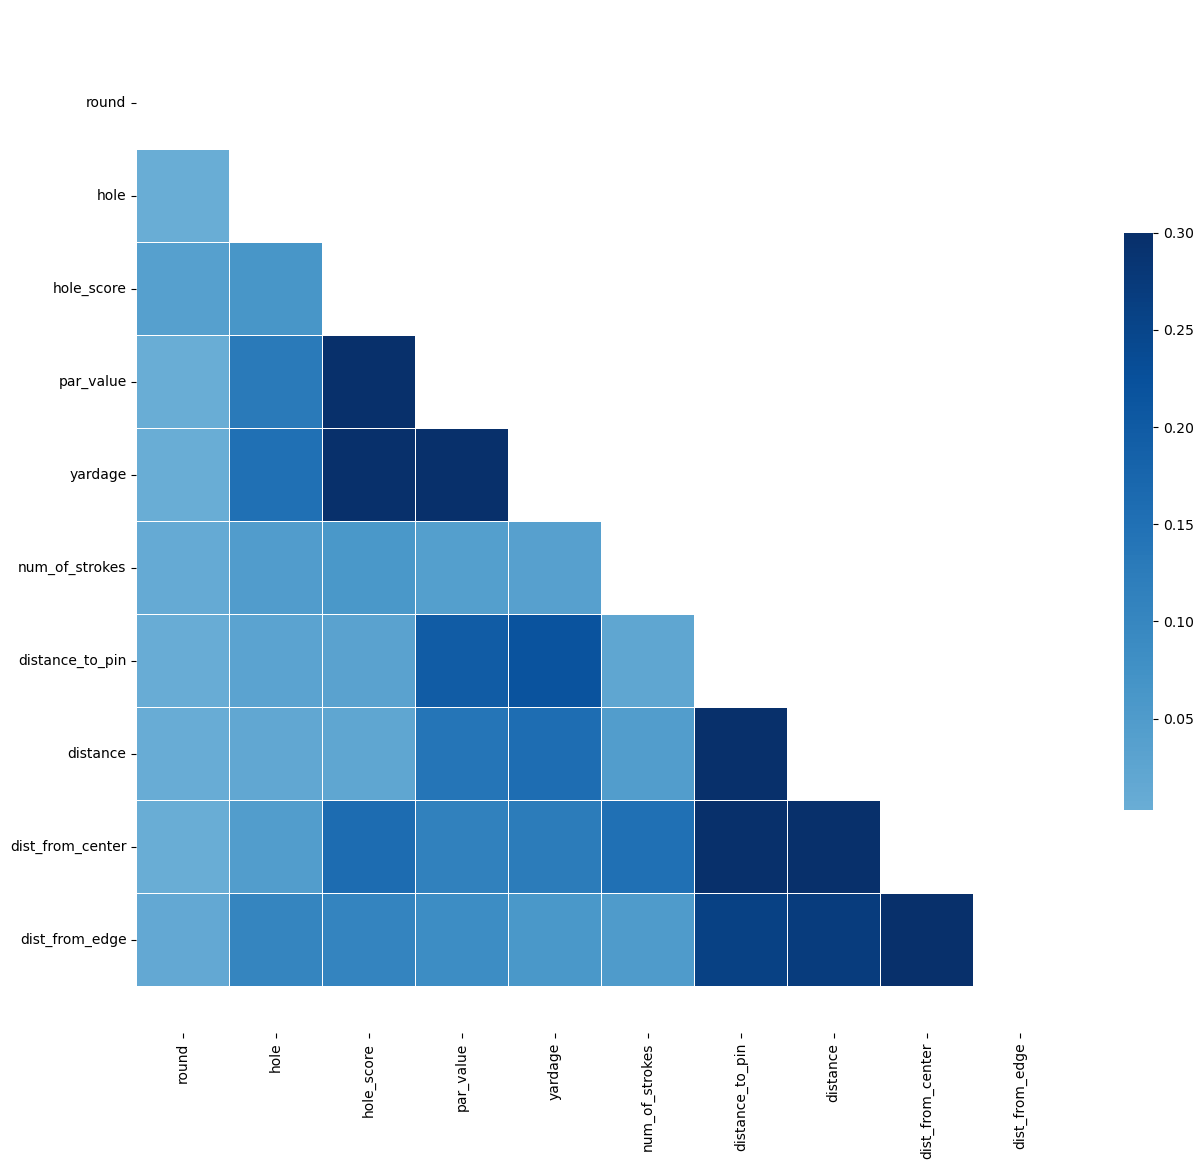

In [9]:
possible_features = df


possible_features = possible_features[[
       'round', 'hole', 
       'hole_score', 'par_value',
       'yardage', 'num_of_strokes', 'distance_to_pin', 'distance',
       'dist_from_center',  'dist_from_edge']]

# Compute the correlation matrix
corr = possible_features.corr()

matrix = np.triu(corr)


plt.figure(figsize=(15, 15))

sns.heatmap(possible_features.corr().abs(), 
            annot=False, cmap="Blues", 
            mask=matrix,
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

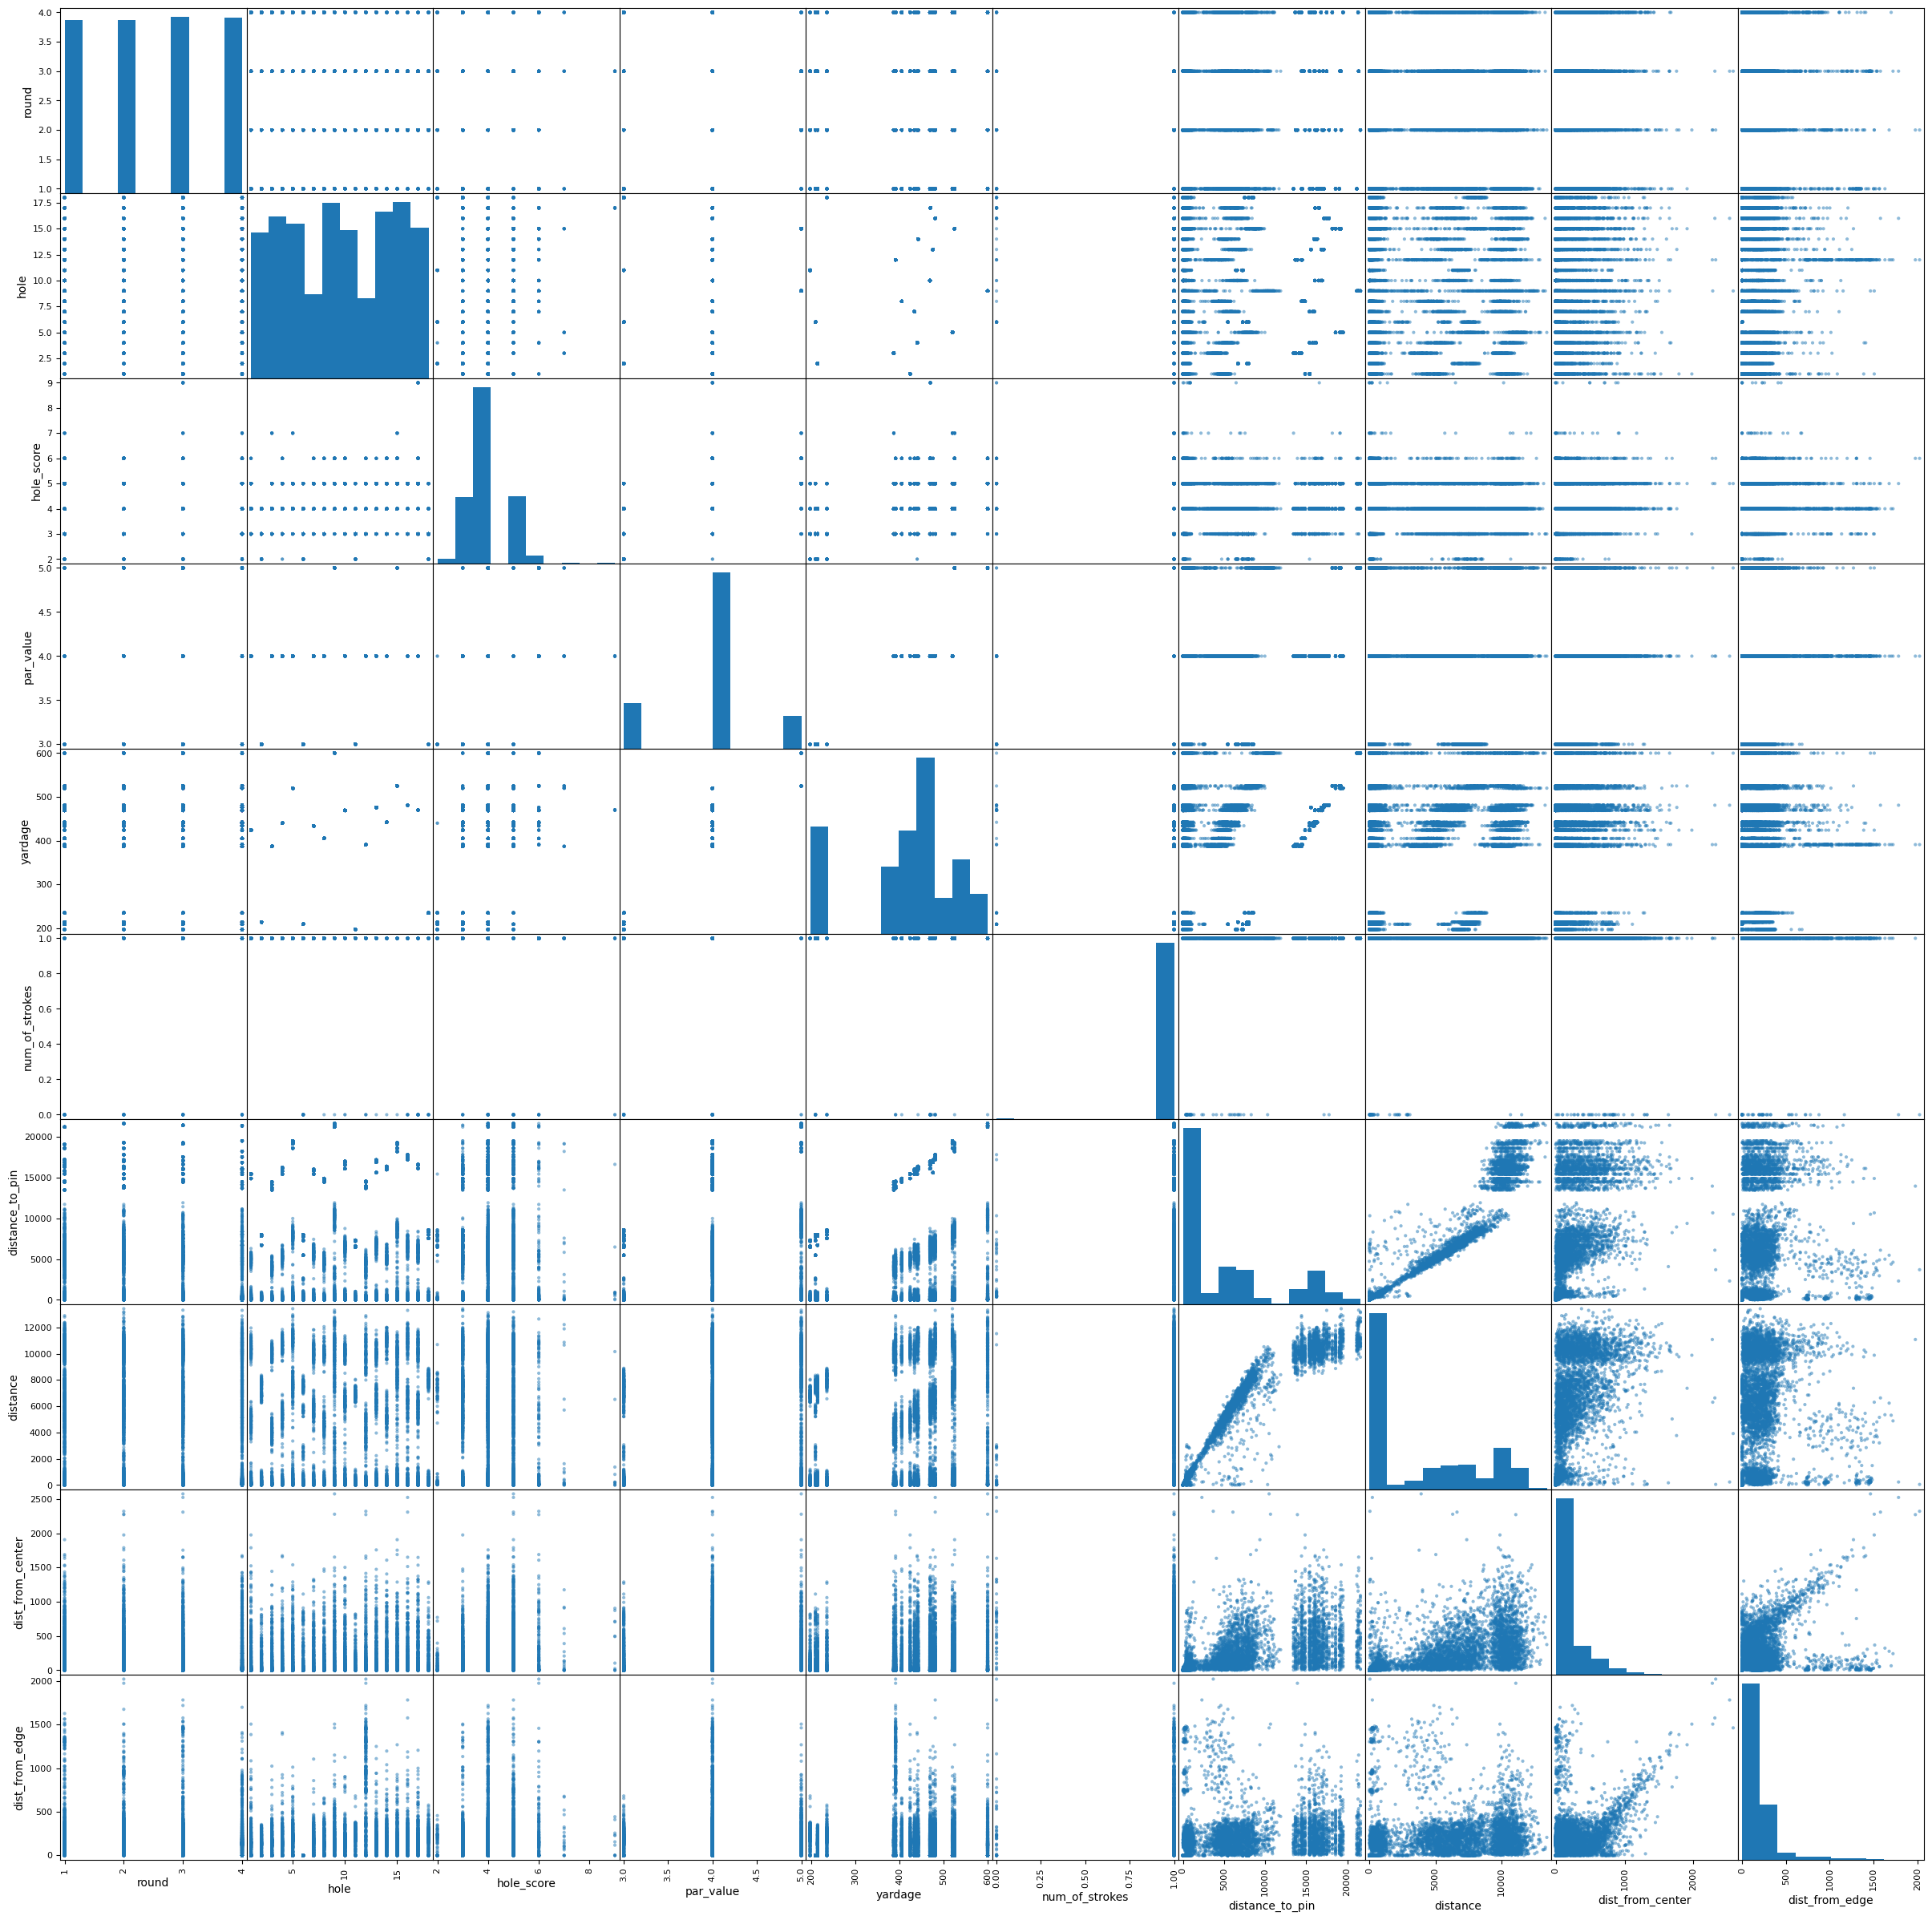

In [10]:
pd.plotting.scatter_matrix(possible_features, figsize=(30, 30))
plt.show()

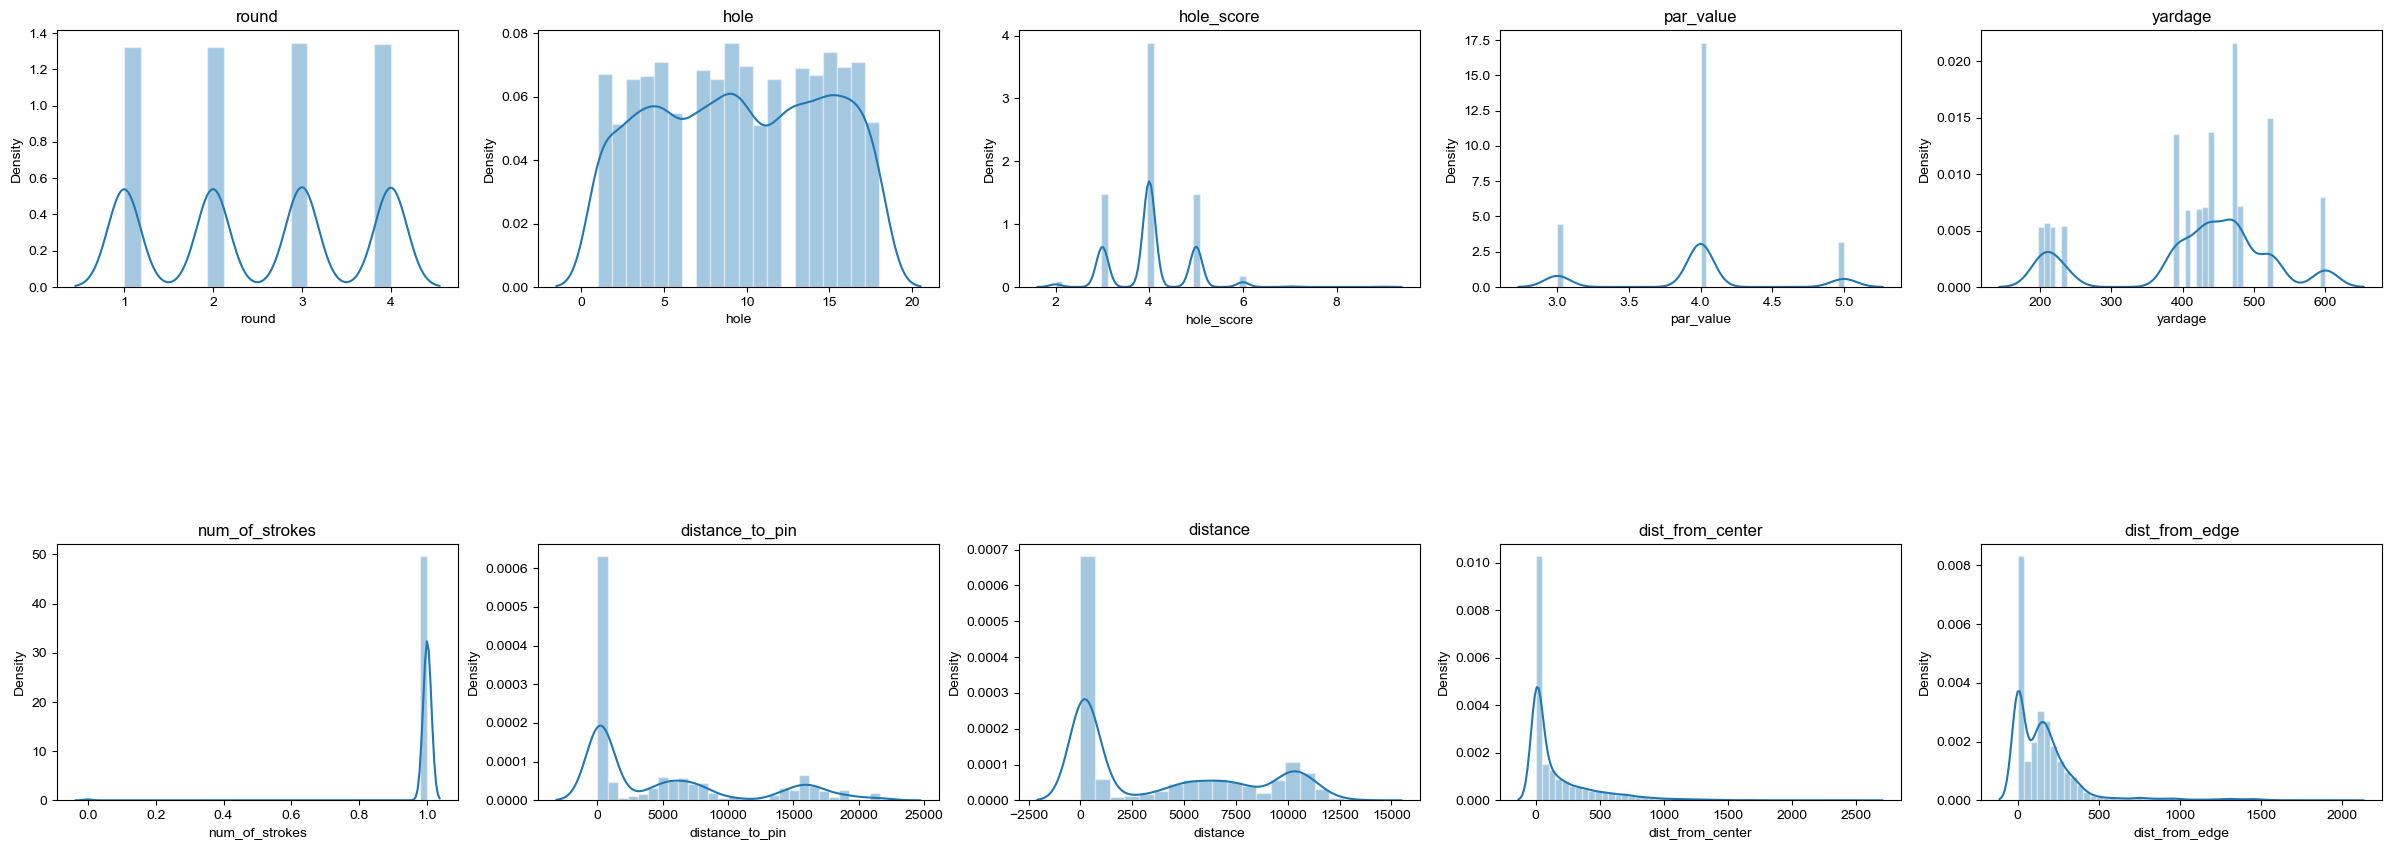

In [11]:
#only turning off for graph
import warnings
warnings.filterwarnings("ignore")

f, ax = plt.subplots(nrows = 2, ncols = 5, figsize=(30,10))
sns.set_theme(style="white")

# Selecting columns we want distributions for 
hist_cols = [
       'round', 'hole', 
       'hole_score', 'par_value',
       'yardage', 'num_of_strokes', 'distance_to_pin', 'distance',
       'dist_from_center',  'dist_from_edge']
row = 0
col = 0

for i, column in enumerate(hist_cols):
    graph = sns.distplot(possible_features[column], ax=ax[row][col])
    graph.set(title = column)
    col += 1
    if col == 5:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

### DO THE FOLLOWING BUT FOR APPROACH SHOTS

<Axes: xlabel='hole_score', ylabel='Density'>

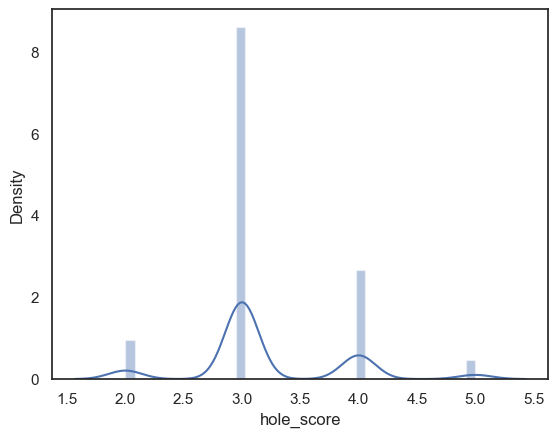

In [17]:
par_3s = df.loc[df['par_value'] == 3]

sns.distplot(par_3s["hole_score"])

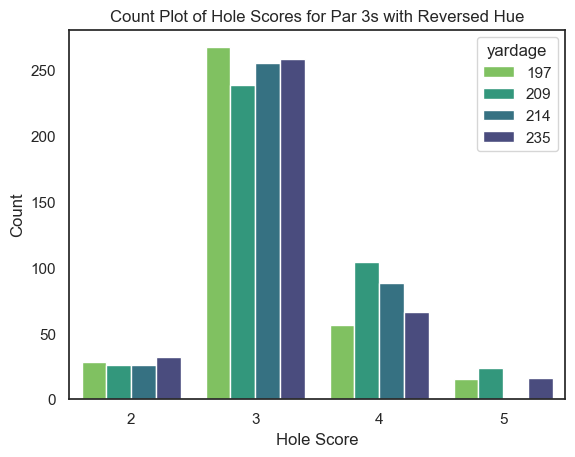

In [18]:
cmap = sns.color_palette("viridis", as_cmap=True)
reversed_cmap = cmap.reversed()

# Create a count plot with reversed hue for yardage using Seaborn
sns.countplot(x='hole_score', hue='yardage', data=par_3s,palette="viridis_r")

# Set plot title and axis labels
plt.title('Count Plot of Hole Scores for Par 3s with Reversed Hue')
plt.xlabel('Hole Score')
plt.ylabel('Count')

# Show the plot
plt.show()

<Axes: xlabel='hole_score', ylabel='Density'>

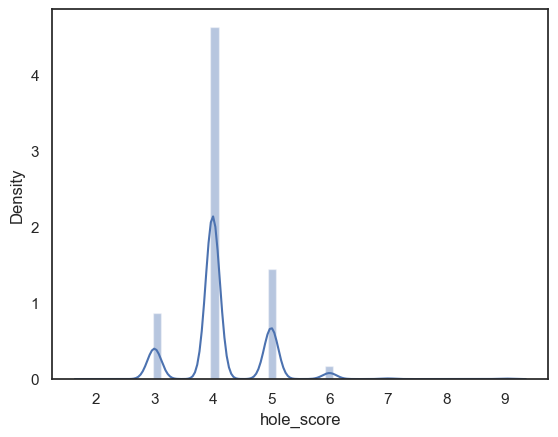

In [19]:
par_4s = df.loc[df['par_value'] == 4]

sns.distplot(par_4s["hole_score"])

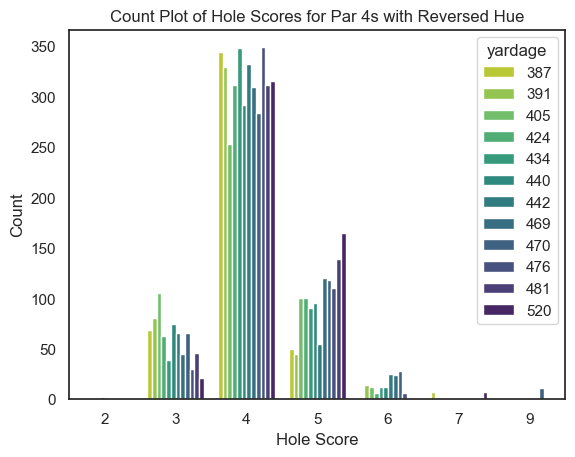

In [20]:
cmap = sns.color_palette("viridis", as_cmap=True)
reversed_cmap = cmap.reversed()

# Create a count plot with reversed hue for yardage using Seaborn
sns.countplot(x='hole_score', hue='yardage', data=par_4s,palette="viridis_r")

# Set plot title and axis labels
plt.title('Count Plot of Hole Scores for Par 4s with Reversed Hue')
plt.xlabel('Hole Score')
plt.ylabel('Count')

# Show the plot
plt.show()

<Axes: xlabel='hole_score', ylabel='Density'>

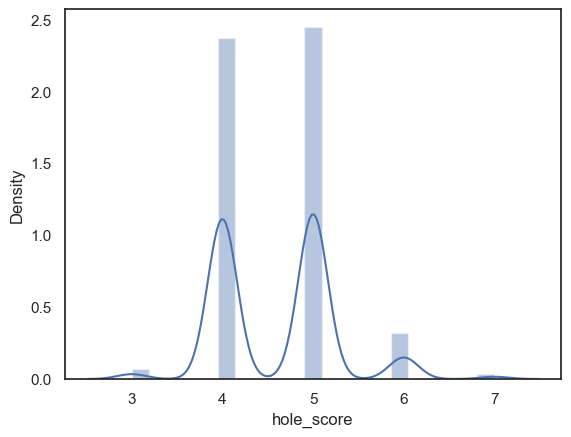

In [21]:
par_5s = df.loc[df['par_value'] == 5]

sns.distplot(par_5s["hole_score"])

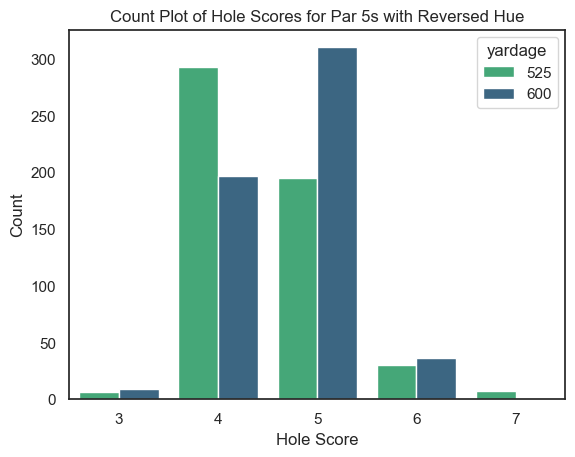

In [22]:
cmap = sns.color_palette("viridis", as_cmap=True)
reversed_cmap = cmap.reversed()

# Create a count plot with reversed hue for yardage using Seaborn
sns.countplot(x='hole_score', hue='yardage', data=par_5s,palette="viridis_r")

# Set plot title and axis labels
plt.title('Count Plot of Hole Scores for Par 5s with Reversed Hue')
plt.xlabel('Hole Score')
plt.ylabel('Count')

# Show the plot
plt.show()

# approach shots, par3s + 4-1 +5-2, and sitance shade the score? minus 2 as well? look at shot 2 and 3  for par4 and par5s?
#bronco guys project
#readmes

## **Distance from Hole vs Score from Corresponding Distance**

In [23]:
selected_columns = ['shot', 'hole_score','distance_to_pin']  # Add the column names you want to select
condensed_df = df[selected_columns]
condensed_df['ended_up_score_they_got'] = (condensed_df['hole_score'] - condensed_df['shot'])+2
condensed_df

,shot,hole_score,distance_to_pin,ended_up_score_they_got
0,1,4,15444,5
1,2,4,4788,4
2,3,4,281,3
3,4,4,39,2
4,1,2,7812,3
...,...,...,...,...
8417,4,5,669,3
8418,5,5,59,2
8419,1,3,8352,4
8420,2,3,305,3


In [24]:
sns.set_theme(style="whitegrid", palette="Set3")

kelly_green = (0/255, 128/255, 0/255)

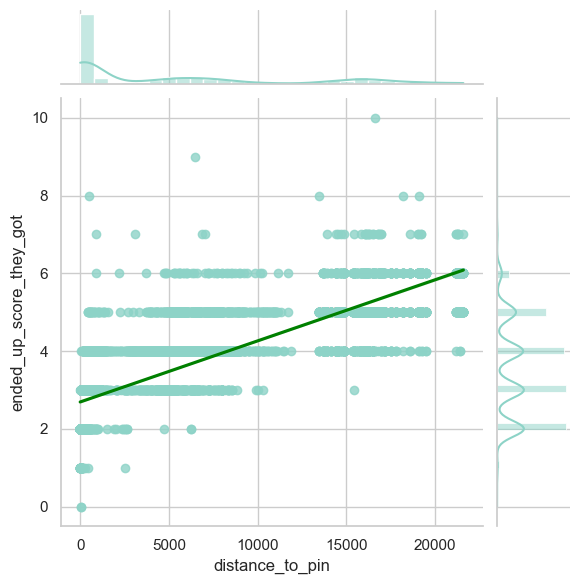

In [25]:
sns.jointplot(
    data=condensed_df, 
    x="distance_to_pin", 
    y="ended_up_score_they_got", 
    kind="reg", 
    line_kws={"color": kelly_green})

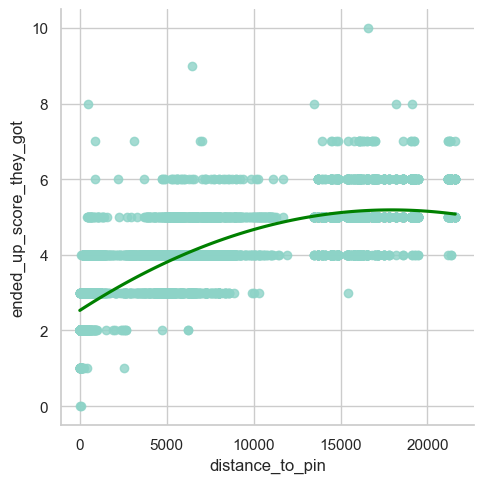

In [26]:
sns.lmplot(data = condensed_df, 
                x="distance_to_pin", 
                y="ended_up_score_they_got",  
                order=2,
                ci=None,
                line_kws={"color": kelly_green}
)